### 1. Get the csv file include Name, sk_rd and hek_rd information

In [ ]:
import pandas as pd

oligo_FC = pd.read_csv('../motif_analyse/oligo_FC_sk.csv')
oligo_FC.head()

,Name,Sequence,log2FoldChange
0,AAGAB|ENST00000261880.10|1,GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...,0.542017
1,AAGAB|ENST00000261880.10|2,GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...,0.457778
2,AAGAB|ENST00000261880.10|3,GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...,-0.036766
3,AAGAB|ENST00000261880.10|4,GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...,0.483780
4,AAGAB|ENST00000261880.10|5,GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...,0.644686


In [3]:
# pandas can read csv and txt file
RNA_MFE = pd.read_csv('haplo-utr3-oligo-pool_MFE.txt', delimiter='\t')

# merge two file based on the common column 'Name'
new_df =pd.merge(oligo_FC[['Name','Sequence', 'log2FoldChange']], RNA_MFE[['Name','MFE']], on='Name', how='left')
print(new_df.head(), len(new_df))

                         Name  \
0  AAGAB|ENST00000261880.10|1   
1  AAGAB|ENST00000261880.10|2   
2  AAGAB|ENST00000261880.10|3   
3  AAGAB|ENST00000261880.10|4   
4  AAGAB|ENST00000261880.10|5   

                                            Sequence  log2FoldChange   MFE  
0  GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017 -69.3  
1  GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778 -66.7  
2  GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766 -85.2  
3  GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780 -88.7  
4  GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686 -82.2   11527


In [4]:
# Calculate GC%
def count_GC(seq):
    gc_count = seq.count('G') + seq.count('C')
    return (gc_count)/len(seq) 


# Apply the function to the sepecfic region in sequence column
new_df['GC_content'] = new_df['Sequence'].str[16:285].apply(count_GC)
print(new_df.head())

new_df.to_csv('Motif_MFE_FC_sk.csv', index=False)

                         Name  \
0  AAGAB|ENST00000261880.10|1   
1  AAGAB|ENST00000261880.10|2   
2  AAGAB|ENST00000261880.10|3   
3  AAGAB|ENST00000261880.10|4   
4  AAGAB|ENST00000261880.10|5   

                                            Sequence  log2FoldChange   MFE  \
0  GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017 -69.3   
1  GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778 -66.7   
2  GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766 -85.2   
3  GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780 -88.7   
4  GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686 -82.2   

   GC_content  
0    0.364312  
1    0.379182  
2    0.464684  
3    0.434944  
4    0.405204  


SK Correlation Matrix:
                log2FoldChange  GC_content       MFE
log2FoldChange        1.000000    0.485052 -0.452802
GC_content            0.485052    1.000000 -0.864133
MFE                  -0.452802   -0.864133  1.000000


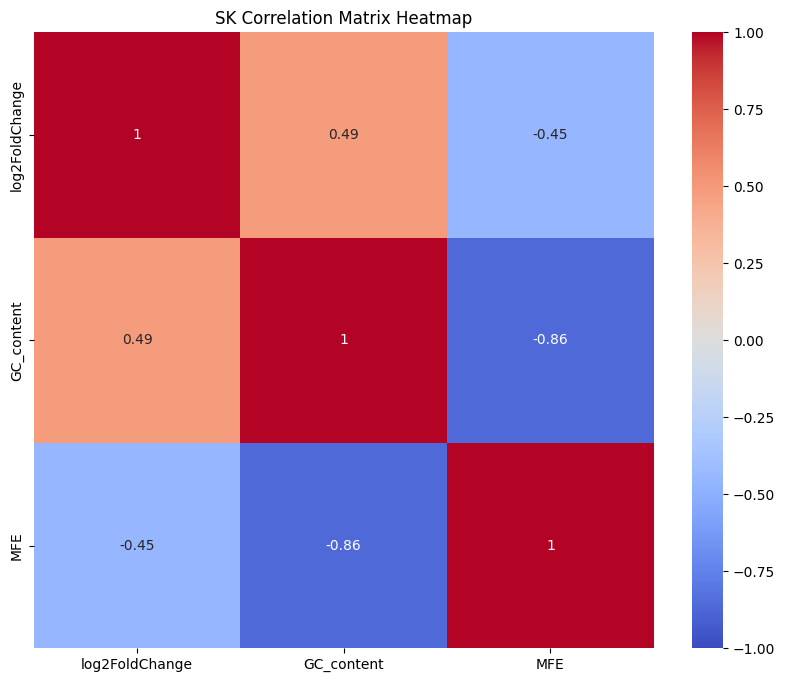

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace Inf with NaN and remove rows with NaN values
new_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df = new_df.dropna()

# Select specific columns
df_sk = df[['log2FoldChange', 'GC_content', 'MFE']]

# Compute correlation matrices
sk_cor = df_sk.corr()

# Print correlation matrices
print("SK Correlation Matrix:")
print(sk_cor)


# Plot heatmap for SK Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sk_cor, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('SK Correlation Matrix Heatmap')
plt.show()

-0.4528021207736502


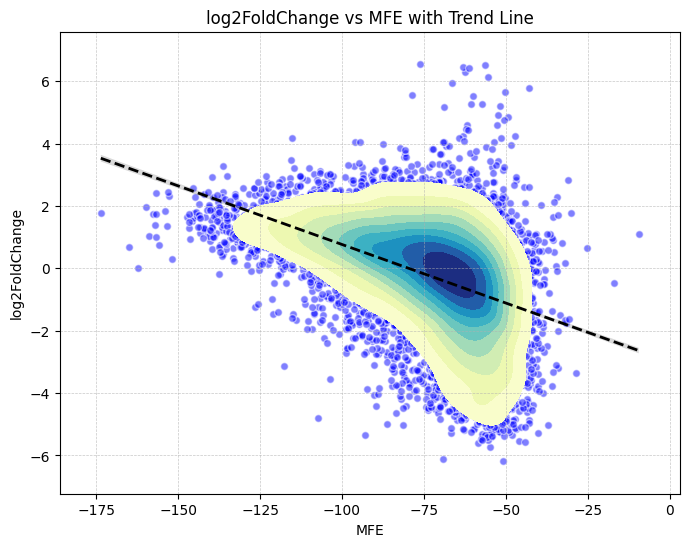

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Spearman correlation
hek_cor = df['log2FoldChange'].corr(df['MFE'], method="pearson")
print(hek_cor)

# Scatter plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='MFE', y='log2FoldChange', data=df, scatter_kws={'alpha':0.5, 'color':'blue', 'edgecolors':'w', 's':30}, line_kws={'color': 'black', 'linestyle': "--", 'linewidth':2})

# Annotating the correlation on the plot
# plt.text(1, max(df['MFE']), f'Corr: {hek_cor:.2f}', fontsize=12, color='red')
sns.kdeplot(y=df['log2FoldChange'], x=df['MFE'], cmap='YlGnBu', fill=True, thresh=0.1)  # KDE plot

# Adding labels and text
plt.xlabel('MFE')
plt.ylabel('log2FoldChange')
plt.title('log2FoldChange vs MFE with Trend Line')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating the correlation on the plot
# plt.text(1, max(df['MFE']), f'Corr: {hek_cor:.2f}', fontsize=12, color='black')

# Show the plot
plt.show()


## AT content and log2FC

In [ ]:
import pandas as pd

oligo_FC = pd.read_csv('../motif_analyse/oligo_FC_sk.csv')
oligo_FC.head()

# pandas can read csv and txt file
RNA_MFE = pd.read_csv('haplo-utr3-oligo-pool_MFE.txt', delimiter='\t')

# merge two file based on the common column 'Name'
new_df =pd.merge(oligo_FC[['Name','Sequence', 'log2FoldChange']], RNA_MFE[['Name','MFE']], on='Name', how='left')
print(new_df.head(), len(new_df))

In [4]:
# Calculate GC%
def count_AT(seq):
    gc_count = seq.count('A') + seq.count('T')
    return (gc_count)/len(seq) 


# Apply the function to the sepecfic region in sequence column
new_df['AT_content'] = new_df['Sequence'].str[16:285].apply(count_AT)
print(new_df.head())

new_df.to_csv('AT_MFE_FC_sk.csv', index=False)

                         Name  \
0  AAGAB|ENST00000261880.10|1   
1  AAGAB|ENST00000261880.10|2   
2  AAGAB|ENST00000261880.10|3   
3  AAGAB|ENST00000261880.10|4   
4  AAGAB|ENST00000261880.10|5   

                                            Sequence  log2FoldChange   MFE  \
0  GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017 -69.3   
1  GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778 -66.7   
2  GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766 -85.2   
3  GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780 -88.7   
4  GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686 -82.2   

   AT_content  
0    0.635688  
1    0.620818  
2    0.535316  
3    0.565056  
4    0.594796  


-0.485051692959173


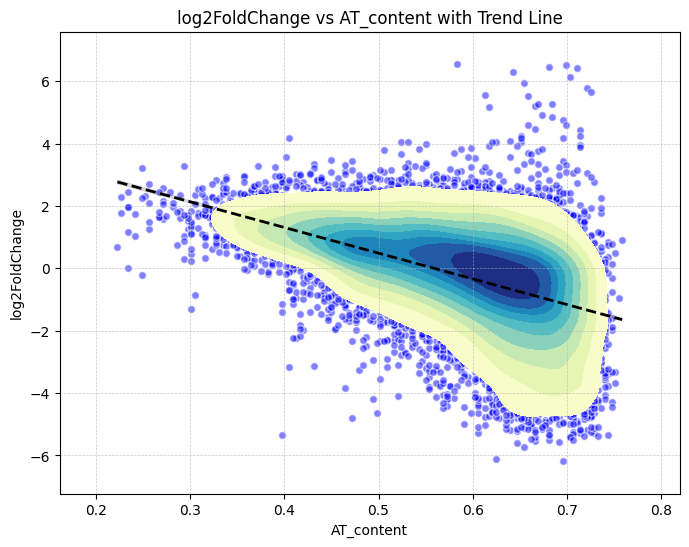

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace Inf with NaN and remove rows with NaN values
new_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df = new_df.dropna()

# Select specific columns
df_sk = df[['log2FoldChange', 'AT_content', 'MFE']]


# Calculate Spearman correlation
hek_cor = df['log2FoldChange'].corr(df['AT_content'], method="pearson")
print(hek_cor)

# Scatter plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(y='log2FoldChange', x='AT_content', data=df, scatter_kws={'alpha':0.5, 'color':'blue', 'edgecolors':'w', 's':30}, line_kws={'color': 'black', 'linestyle': "--", 'linewidth':2})

# Annotating the correlation on the plot
# plt.text(1, max(df['AT_content']), f'Corr: {hek_cor:.2f}', fontsize=12, color='red')
sns.kdeplot(y=df['log2FoldChange'], x=df['AT_content'], cmap='YlGnBu', fill=True, thresh=0.1)  # KDE plot

# Adding labels and text
plt.xlabel('AT_content')
plt.ylabel('log2FoldChange')
plt.title('log2FoldChange vs AT_content with Trend Line')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating the correlation on the plot
# plt.text(1, max(df['AT_content']), f'Corr: {hek_cor:.2f}', fontsize=12, color='black')

# Show the plot
plt.show()

-0.8641329974862043


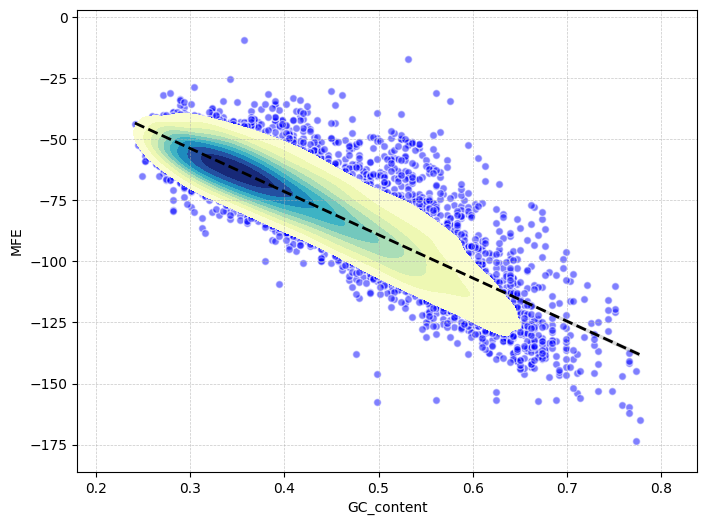

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Spearman correlation
hek_cor = df['MFE'].corr(df['GC_content'], method="pearson")
print(hek_cor)

# Scatter plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(y='MFE', x='GC_content', data=df, scatter_kws={'alpha':0.5, 'color':'blue', 'edgecolors':'w', 's':30}, line_kws={'color': 'black', 'linestyle': "--", 'linewidth':2})

# Annotating the correlation on the plot
# plt.text(1, max(df['GC_content']), f'Corr: {hek_cor:.2f}', fontsize=12, color='red')
sns.kdeplot(y=df['MFE'], x=df['GC_content'], cmap='YlGnBu', fill=True, thresh=0.1)  # KDE plot

# Adding labels and text
plt.xlabel('GC_content')
plt.ylabel('MFE')
# plt.title('MFE vs GC_content with Trend Line')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating the correlation on the plot
# plt.text(1, max(df['GC_content']), f'Corr: {hek_cor:.2f}', fontsize=12, color='black')

# Show the plot
plt.show()

In [17]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import product


# Generate all possible 5-nt motifs
bases = ['A', 'T', 'C', 'G']
motifs = [''.join(p) for p in product(bases, repeat=5)]

# Function to count a motif in a sequence
def count_motif(sequence, motif):
    return sequence.count(motif)

# Adjust sequences to consider only the 16th to 185th nucleotides
# Python uses 0-based indexing, so we need positions 15 to 185
new_df['Adjusted Sequence'] = new_df['Sequence'].apply(lambda x: x[15:285])

len(new_df['Adjusted Sequence'][1])


270

In [18]:
from scipy.stats import ttest_ind

summary = []

for motif in motifs:
        # count occurrences of each motif in each sequence
        new_df[motif] =new_df['Adjusted Sequence'].apply(lambda x: count_motif(x, motif))

        # Determine sequences with and without motif
        with_motif = new_df[new_df[motif] >0]
        without_motif = new_df[new_df[motif] == 0]

        # calculate the mean value
        mean_with_motif = with_motif['MFE'].mean() if not with_motif.empty else np.nan
        mean_without_motif = without_motif['MFE'].mean() if not without_motif.empty else np.nan
        
        # t-test to analyze with_motif and without_motif, change Inf into nan, then omit nan
        with_motif['MFE'].replace([np.inf, -np.inf], np.nan, inplace=True)
        without_motif['MFE'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        t_stat, p_value = ttest_ind(with_motif['MFE'], without_motif['MFE'],equal_var=False, nan_policy='omit')

        summary.append({
            'Motif': motif,
            'Count_With_Motif': len(with_motif),
            'Count_Without_Motif': len(without_motif),
            'Mean_Value_With_Motif': mean_with_motif,
            'Mean_Value_Without_Motif': mean_without_motif,
            'Pvalue': p_value
    
        })

/tmp/ipykernel_3251460/744193295.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  with_motif['MFE'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_3251460/744193295.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_motif['MFE'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_3251460/744193295.py:19:

In [19]:
# Convert the summary list to a df
summary_df = pd.DataFrame(summary)
print(summary_df.head(), len(summary_df))

summary_df['MFE_ratio'] = summary_df['Mean_Value_With_Motif']/summary_df['Mean_Value_Without_Motif']
sorted_df = summary_df.sort_values(by='MFE_ratio', ascending=False)
sorted_df.to_csv('Motif_MFE_FC_hek.csv', index=False)

   Motif  Count_With_Motif  Count_Without_Motif  Mean_Value_With_Motif  \
0  AAAAA              5646                 5881             -67.779911   
1  AAAAT              6432                 5095             -67.400779   
2  AAAAC              4404                 7123             -68.287461   
3  AAAAG              5295                 6232             -69.087126   
4  AAATA              5591                 5936             -67.051887   

   Mean_Value_Without_Motif         Pvalue  
0                -81.036240  1.506477e-300  
1                -83.559902   0.000000e+00  
2                -78.410997  3.057744e-182  
3                -79.178944  4.629877e-176  
4                -81.599126   0.000000e+00   1024


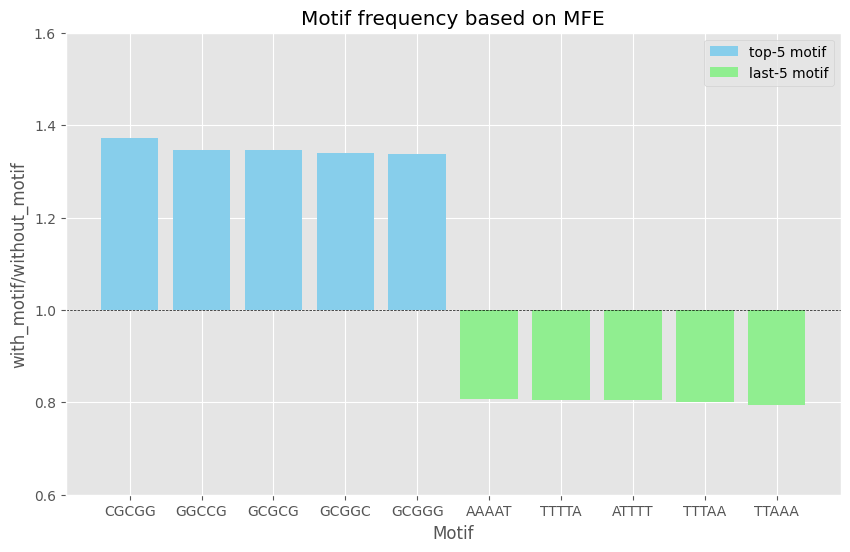

In [20]:
# using the top 5 and tail 5 most frequenct motif to draw a bar plot using ratio

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motif_MFE_FC_hek.csv')

top_5 = df.loc[:4, ['Motif','MFE_ratio']]
tail_5 = df.loc[df.shape[0]-5:, ['Motif', 'MFE_ratio']]

select_df = pd.concat([top_5, tail_5])

# create x-axis labels
motif_labels = select_df['Motif']
select_df.index = motif_labels

# draw bar plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for the two groups
colors = ['skyblue', 'lightgreen']

# Plot the first 5 rows
ax.bar(top_5['Motif'], top_5['MFE_ratio'] - 1, bottom=1, color=colors[0], label='top-5 motif')

# Plot the last 5 rows
ax.bar(tail_5['Motif'], tail_5['MFE_ratio'] - 1, bottom=1, color=colors[1], label='last-5 motif')

# Adding titles and labels
plt.title('Motif frequency based on MFE')
plt.xlabel('Motif')
plt.ylabel('with_motif/without_motif')

# Draw a horizontal line at y=1
plt.axhline(1, color='black', linewidth=0.5, linestyle='--')

# Legend
plt.legend()

# Adjust the y-axis to better show the plot based on your data's range
plt.ylim(0.6, 1.6)

# Show the plot
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motif_MFE_FC_hek.csv')
sorted_df = df.sort_values(by='Count_With_Motif', ascending=False)

print(sorted_df.head())

      Motif  Count_With_Motif  Count_Without_Motif  Mean_Value_With_Motif  \
1021  ATTTT              7094                 4433             -68.170653   
1020  TTTTA              6711                 4816             -67.720504   
998   TTTTT              6603                 4924             -68.654949   
903   TTTCT              6520                 5007             -70.444972   
1019  AAAAT              6432                 5095             -67.400779   

      Mean_Value_Without_Motif         Pvalue  MFE_ratio  
1021                -84.741011   0.000000e+00   0.804459  
1020                -84.050500   0.000000e+00   0.805712  
998                 -82.439253  3.086181e-285   0.832794  
903                 -79.879826  3.308056e-136   0.881887  
1019                -83.559902   0.000000e+00   0.806616  


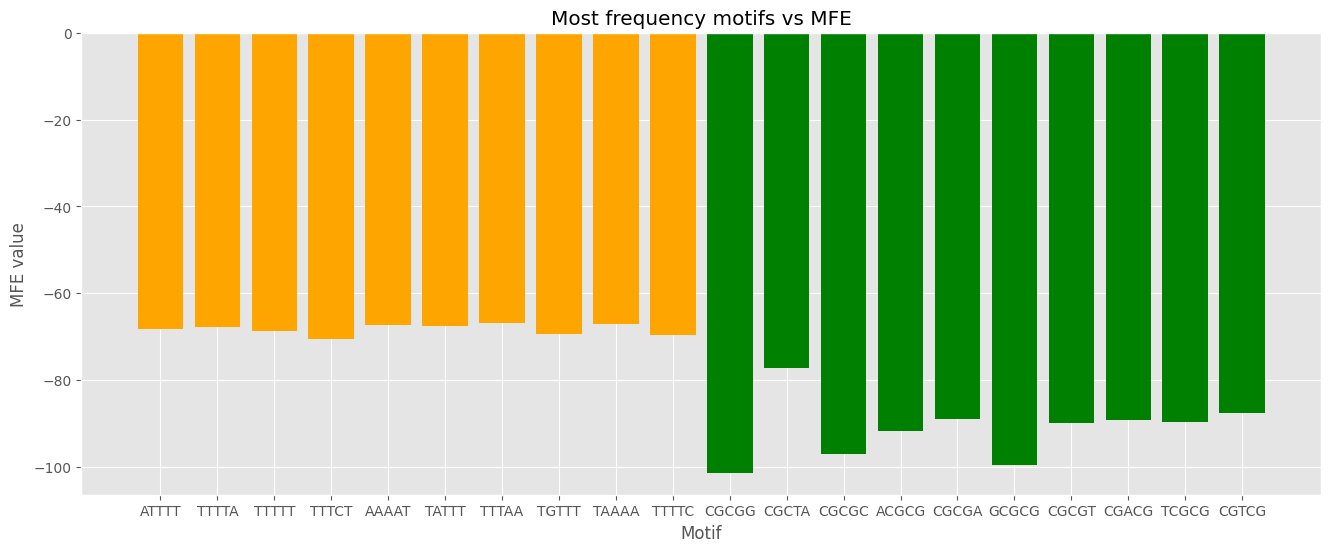

In [22]:
top_10 =sorted_df.iloc[:10][['Motif','Mean_Value_With_Motif']]
tail_10 = sorted_df.tail(10)[['Motif', 'Mean_Value_With_Motif']]

# print(tail_10)
plt.figure(figsize=(16, 6))

plt.bar(top_10['Motif'],top_10['Mean_Value_With_Motif'], color='orange')
plt.bar(tail_10['Motif'],tail_10['Mean_Value_With_Motif'], color='green')

plt.xlabel('Motif')
plt.ylabel('MFE value')
plt.title('Most frequency motifs vs MFE')
plt.show()

-0.5637847369570769


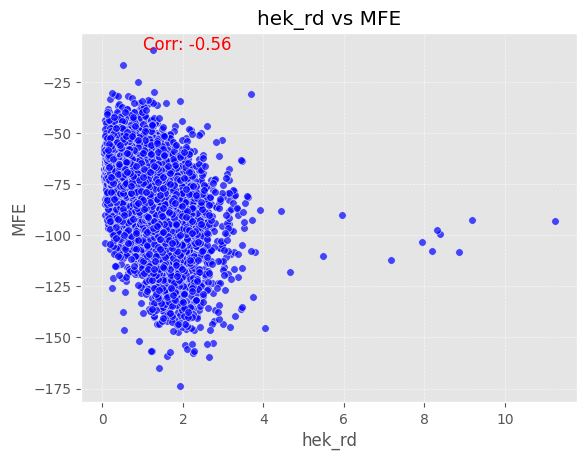

-0.42548876816861003


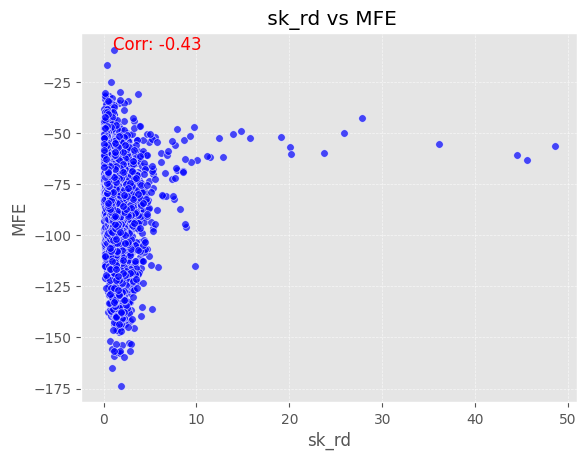

In [11]:
# analysis the correlation between rna/dna and MFE
import pandas as pd
import matplotlib.pyplot as plt

sk_cor = df['sk_rd'].corr(df['MFE'], method="spearman")
print(sk_cor)

# scatter plot
plt.scatter(df['sk_rd'], df['MFE'], alpha=0.7, color='blue', edgecolors='w', s=30)

# Adding labels and text
plt.xlabel('sk_rd')
plt.ylabel('MFE')
plt.title(' sk_rd vs MFE')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Annotating the correlation on the plot
plt.text(1, max(df['MFE']), f'Corr: {sk_cor:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()

In [2]:
import pandas as pd

oligo_FC = pd.read_csv('../motif_analyse/oligo_FC_sk.csv')
oligo_FC.head()

,Name,Sequence,log2FoldChange
0,AAGAB|ENST00000261880.10|1,GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...,0.542017
1,AAGAB|ENST00000261880.10|2,GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...,0.457778
2,AAGAB|ENST00000261880.10|3,GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...,-0.036766
3,AAGAB|ENST00000261880.10|4,GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...,0.483780
4,AAGAB|ENST00000261880.10|5,GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...,0.644686


In [4]:
# Calculate GC%
def count_GC(seq):
    gc_count = seq.count('G') + seq.count('C')
    return (gc_count)/len(seq) 


# Apply the function to the sepecfic region in sequence column
oligo_FC['GC_content'] = oligo_FC['Sequence'].str[16:285].apply(count_GC)
print(oligo_FC.head())

                         Name  \
0  AAGAB|ENST00000261880.10|1   
1  AAGAB|ENST00000261880.10|2   
2  AAGAB|ENST00000261880.10|3   
3  AAGAB|ENST00000261880.10|4   
4  AAGAB|ENST00000261880.10|5   

                                            Sequence  log2FoldChange  \
0  GTTCAGCGTCGACCAATTATTCATACTAGGGTTTGACCAACAAAGA...        0.542017   
1  GTTCAGCGTCGACCATTAGTTTTTAGTAGGAGGTTAAGGAGAAATC...        0.457778   
2  GTTCAGCGTCGACCATAAATCTCAGAGGTCTGTGTGATTTACTCAA...       -0.036766   
3  GTTCAGCGTCGACCAATTTGGGTTTTCTCCATTCAAGGAGCTTGTA...        0.483780   
4  GTTCAGCGTCGACCAGAAAATGCCTCTGGGCATTCTTTTGAAGTAT...        0.644686   

   GC_content  
0    0.364312  
1    0.379182  
2    0.464684  
3    0.434944  
4    0.405204  


In [14]:
data.to_csv('ratio_MFE_AT.csv')

HEK Correlation Matrix:
              hek_rd  AT_content       MFE
hek_rd      1.000000   -0.572830 -0.536983
AT_content -0.572830    1.000000  0.859581
MFE        -0.536983    0.859581  1.000000

SK Correlation Matrix:
               sk_rd  AT_content       MFE
sk_rd       1.000000   -0.162610 -0.153668
AT_content -0.162610    1.000000  0.859581
MFE        -0.153668    0.859581  1.000000


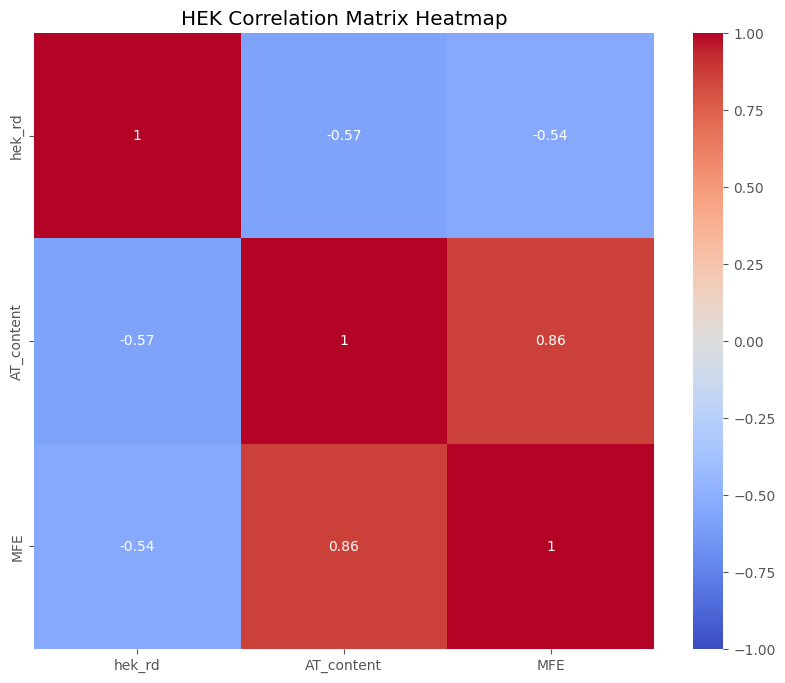

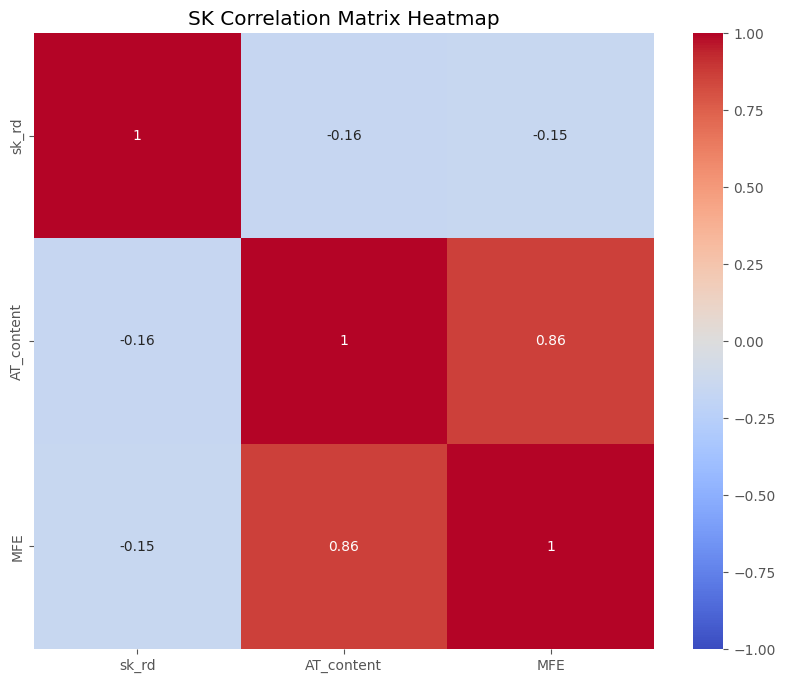

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace Inf with NaN and remove rows with NaN values
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df = data.dropna()

# Select specific columns
df_hek = df[['hek_rd', 'AT_content', 'MFE']]
df_sk = df[['sk_rd', 'AT_content', 'MFE']]

# Compute correlation matrices
hek_cor = df_hek.corr()
sk_cor = df_sk.corr()

# Print correlation matrices
print("HEK Correlation Matrix:")
print(hek_cor)
print("\nSK Correlation Matrix:")
print(sk_cor)

# Plot heatmap for HEK Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(hek_cor, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('HEK Correlation Matrix Heatmap')
plt.show()

# Plot heatmap for SK Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sk_cor, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('SK Correlation Matrix Heatmap')
plt.show()


In [36]:
# Partial correlation

import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean the data
def clean_data(df, columns):
    """
    Clean the dataframe by ensuring columns are numeric and dropping NaN values.
    """
    df = df[columns].apply(pd.to_numeric, errors='coerce')
    return df.dropna()

def compute_partial_corr(df):
    # Compute pairwise partial correlations
    pcorr_matrix = pg.partial_corr(data=df, x='hek_rd', y='AT_content', covar=['MFE'])
    return pcorr_matrix.pivot(index='X', columns='Y', values='r')

columns_hek = ['hek_rd', 'AT_content', 'MFE']
columns_sk = ['sk_rd', 'AT_content', 'MFE']

df_hek_cleaned = clean_data(df, columns_hek)
df_sk_cleaned = clean_data(df, columns_sk)

# For df_hek
hek_pcorr_matrix = compute_partial_corr(df_hek_cleaned)

# For df_sk (adjust to your variables)
sk_pcorr_matrix = compute_partial_corr(df_sk_cleaned)



KeyError: 'X'